<a href="https://colab.research.google.com/github/BhagwatPriyanka/UK-TUS-Analysis/blob/main/clustering_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as pyoff
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [95]:
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)

# **Respondant Personal Information**

In [96]:
household = pd.read_csv('/content/household.csv', na_values=" ", usecols=["serial","hh_wt","NumAdult","NumChild","Income"])
household.head()

,serial,hh_wt,NumAdult,NumChild,Income
0,11010903,nan,2,0,3000
1,11010904,nan,2,0,-9
2,11010906,nan,3,0,3200
3,11010907,nan,2,1,1100
4,11010908,nan,1,0,-9


In [97]:
# get names of indexes for which
index_names = household[ household['Income'] == -8 ].index
  
# drop these row indexes
# from dataFrame
household.drop(index_names, inplace = True)

In [98]:
# get names of indexes for which
index_names = household[ household['Income'] == -9 ].index
  
# drop these row indexes
# from dataFrame
household.drop(index_names, inplace = True)

In [99]:
household.isna().sum()

serial      0  
hh_wt       307
NumAdult    0  
NumChild    0  
Income      0  
dtype: int64

In [100]:
household.dropna()

,serial,hh_wt,NumAdult,NumChild,Income
11,11011202,0.824717,3,1,3000
12,11011203,1.193769,2,0,2500
13,11011207,0.793503,2,0,1500
14,11011209,0.835203,2,0,1500
15,11011210,0.849499,2,2,3500
...,...,...,...,...,...
4724,54051014,0.862761,1,0,390
4725,54051015,0.793346,2,0,3000
4726,55051004,0.899909,2,0,2500
4728,55051011,0.794184,2,0,1400


In [101]:
household.shape

(3599, 5)

In [102]:
individual = pd.read_csv('/content/individual.csv', na_values=" ",usecols=["serial","pnum","DMSex","WorkSta","VehNum","DVAge","MarStat","Relate2","ind_wt"])
individual.head()

,serial,pnum,ind_wt,DMSex,WorkSta,DVAge,MarStat,Relate2,VehNum
0,11010903,1,nan,1,4,80,3,1,2
1,11010903,2,nan,2,4,71,3,0,2
2,11010904,1,nan,2,2,55,3,1,2
3,11010904,2,nan,1,2,62,3,0,2
4,11010906,1,nan,2,2,52,3,1,4


In [103]:
individual.isna().sum()

serial     0   
pnum       0   
ind_wt     2844
DMSex      0   
WorkSta    0   
DVAge      0   
MarStat    0   
Relate2    0   
VehNum     0   
dtype: int64

In [104]:
individual.dropna()

,serial,pnum,ind_wt,DMSex,WorkSta,DVAge,MarStat,Relate2,VehNum
23,11011202,1,0.828011,2,2,48,3,1,4
26,11011202,4,0.856161,1,-1,13,-1,4,4
27,11011203,1,1.134924,1,4,75,3,1,2
29,11011207,1,0.745875,2,4,68,3,1,1
30,11011207,2,0.743546,1,4,74,3,0,1
...,...,...,...,...,...,...,...,...,...
11410,55051004,2,0.893755,1,2,52,3,0,2
11412,55051011,1,0.744185,1,4,67,6,-2,1
11413,55051011,2,0.746516,2,4,74,7,0,1
11414,55051014,1,1.160821,2,4,61,3,1,3


In [105]:
individual.shape

(11421, 9)

# **Merging respondant data files**

In [106]:
# respondent + household data
respondentCleanedData = individual.merge(household, on=["serial"])

In [107]:
respondentCleanedData.shape

(8579, 13)

In [108]:
respondentCleanedData.head()

,serial,pnum,ind_wt,DMSex,WorkSta,DVAge,MarStat,Relate2,VehNum,hh_wt,NumAdult,NumChild,Income
0,11010903,1,nan,1,4,80,3,1,2,nan,2,0,3000
1,11010903,2,nan,2,4,71,3,0,2,nan,2,0,3000
2,11010906,1,nan,2,2,52,3,1,4,nan,3,0,3200
3,11010906,2,nan,1,2,48,3,0,4,nan,3,0,3200
4,11010906,3,nan,2,7,18,-1,4,4,nan,3,0,3200


In [109]:
respondentCleanedData = respondentCleanedData.replace(-1, np.NaN)
respondentCleanedData = respondentCleanedData.replace(-9, np.NaN)
respondentCleanedData = respondentCleanedData.replace(-8, np.NaN)
respondentCleanedData = respondentCleanedData.replace(-2, np.NaN)

In [110]:
respondentCleanedData.isna().sum()

serial      0   
pnum        0   
ind_wt      1971
DMSex       0   
WorkSta     1850
DVAge       0   
MarStat     2263
Relate2     1131
VehNum      1410
hh_wt       677 
NumAdult    0   
NumChild    0   
Income      0   
dtype: int64

In [111]:
respondentCleanedData.dropna(subset=["ind_wt","WorkSta","Relate2","MarStat","VehNum","hh_wt"],inplace=True)

In [112]:
respondentCleanedData.describe()

,serial,pnum,ind_wt,DMSex,WorkSta,DVAge,MarStat,Relate2,VehNum,hh_wt,NumAdult,NumChild,Income
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,17108016.262120,1.702389,0.984744,1.517977,3.404778,45.845048,2.669682,1.919276,1.765020,0.977830,2.450476,0.651357,4092.202737
std,6642990.239977,0.815620,0.320825,0.499735,5.991461,17.334263,1.134936,3.252909,0.920376,0.288595,0.861819,0.986568,7669.440508
min,11011202.000000,1.000000,0.336482,1.000000,1.000000,16.000000,1.000000,0.000000,1.000000,0.347257,1.000000,0.000000,1.000000
25%,13160309.000000,1.000000,0.778324,1.000000,2.000000,32.000000,2.000000,0.000000,1.000000,0.788434,2.000000,0.000000,1800.000000
50%,16090608.000000,2.000000,0.930459,2.000000,2.000000,45.000000,3.000000,1.000000,2.000000,0.926981,2.000000,0.000000,2600.000000
75%,18660612.000000,2.000000,1.121570,2.000000,4.000000,59.000000,3.000000,3.000000,2.000000,1.117433,3.000000,1.000000,4000.000000
max,55051011.000000,7.000000,4.994092,2.000000,97.000000,99.000000,7.000000,19.000000,20.000000,4.008668,8.000000,5.000000,100000.000000


# **Respondant Activity Information**

In [113]:
wide = pd.read_csv('/content/wide.csv', na_values=" ", usecols=["serial","pnum","dia_wt_a","dia_wt_b"])
wide.head()

,serial,pnum,dia_wt_a,dia_wt_b
0,11011202,1,2.021182,1.581180
1,11011202,1,0.861148,1.581180
2,11011202,4,2.057808,1.583635
3,11011202,4,0.902827,1.583635
4,11011203,1,0.698075,1.258827


In [114]:
wide.shape

(16533, 4)

In [115]:
wide.isna().sum()

serial      0
pnum        0
dia_wt_a    2
dia_wt_b    2
dtype: int64

In [116]:
wide.dropna(subset=["dia_wt_a","dia_wt_b"],inplace=True)

In [117]:
episode = pd.read_csv('/content/episode.csv', na_values=" ", usecols=["serial","pnum","dia_wt_a","dia_wt_b","eptime","whatdoing","What_Oth1","WhereWhen","Device","WithSpouse","Enjoy"])
episode.head()

,serial,pnum,dia_wt_a,dia_wt_b,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy
0,11011202,1,2.021182,1.581180,110,110,-9,11,0,1,7
1,11011202,1,2.021182,1.581180,10,8219,111,11,0,1,7
2,11011202,1,2.021182,1.581180,10,310,-9,11,0,0,3
3,11011202,1,2.021182,1.581180,10,3210,-9,11,0,0,3
4,11011202,1,2.021182,1.581180,10,3110,-9,11,1,0,5


In [118]:
episode.shape

(587632, 11)

In [119]:
episode.isna().sum()

serial        0 
pnum          0 
dia_wt_a      89
dia_wt_b      89
eptime        0 
whatdoing     0 
What_Oth1     0 
WhereWhen     0 
Device        0 
WithSpouse    0 
Enjoy         0 
dtype: int64

In [120]:
episode.dropna(subset=["dia_wt_a","dia_wt_b"],inplace=True)

# **Merging activity file**

In [121]:
# respondent + household data
activityCleanedData = wide.merge(episode, on=["serial","dia_wt_a","dia_wt_b","pnum"])
activityCleanedData.head()

,serial,pnum,dia_wt_a,dia_wt_b,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy
0,11011202,1,2.021182,1.581180,110,110,-9,11,0,1,7
1,11011202,1,2.021182,1.581180,10,8219,111,11,0,1,7
2,11011202,1,2.021182,1.581180,10,310,-9,11,0,0,3
3,11011202,1,2.021182,1.581180,10,3210,-9,11,0,0,3
4,11011202,1,2.021182,1.581180,10,3110,-9,11,1,0,5


In [122]:
activityCleanedData.shape

(587766, 11)

In [123]:
activityCleanedData.drop_duplicates(subset="serial", keep="first", inplace=True)

In [124]:
activityCleanedData.head(15)

,serial,pnum,dia_wt_a,dia_wt_b,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy
0,11011202,1,2.021182,1.581180,110,110,-9,11,0,1,7
142,11011203,1,0.698075,1.258827,210,110,-9,11,0,1,7
250,11011207,1,1.501065,1.012621,10,110,-9,11,0,0,7
382,11011209,1,2.432373,1.498889,90,110,-9,11,0,1,7
501,11011210,1,1.221118,0.946286,180,110,-9,11,0,1,7
688,11011211,1,0.623977,1.016603,160,110,-9,11,0,1,7
846,11011212,1,0.459256,0.799824,120,110,-9,11,0,1,7
1150,11011213,1,0.437913,0.762653,80,110,-9,11,0,1,7
1353,11011217,1,1.722192,0.991394,90,110,-9,11,0,0,7
1436,11011219,1,1.075249,0.829447,230,110,-9,11,0,0,6


In [125]:
activityCleanedData.describe()

,serial,pnum,dia_wt_a,dia_wt_b,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy
count,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000
mean,17214835.274060,1.015370,0.969923,0.978428,154.192480,215.209506,72.107590,10.949161,-0.622369,0.485694,2.520690
std,6559147.759973,0.168471,0.614516,0.416377,97.886569,804.651235,742.746342,3.617996,2.309431,0.499854,5.876356
min,11011202.000000,1.000000,0.164118,0.254079,10.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000,-9.000000
25%,13220909.000000,1.000000,0.496090,0.702480,70.000000,110.000000,-9.000000,11.000000,0.000000,0.000000,-1.000000
50%,16140407.000000,1.000000,0.809073,0.887603,170.000000,110.000000,-9.000000,11.000000,0.000000,0.000000,6.000000
75%,19050515.000000,1.000000,1.277883,1.159865,210.000000,110.000000,-9.000000,11.000000,0.000000,1.000000,7.000000
max,55051020.000000,5.000000,6.879020,4.638436,720.000000,9510.000000,8319.000000,90.000000,1.000000,1.000000,7.000000


In [126]:
activityCleanedData = activityCleanedData.replace(-9, np.NaN)
activityCleanedData = activityCleanedData.replace(-1, np.NaN)

In [127]:
activityCleanedData.isna().sum()

serial        0   
pnum          0   
dia_wt_a      0   
dia_wt_b      0   
eptime        0   
whatdoing     0   
What_Oth1     4146
WhereWhen     63  
Device        298 
WithSpouse    0   
Enjoy         1361
dtype: int64

In [128]:
activityCleanedData.dropna(subset=["What_Oth1","WhereWhen","Device","Enjoy"],inplace=True)

In [129]:
activityCleanedData.describe()

,serial,pnum,dia_wt_a,dia_wt_b,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,17665823.092308,1.000000,0.889599,0.897354,30.923077,2334.123077,4375.138462,13.815385,0.230769,0.369231,3.876923
std,7269744.279902,0.000000,0.489788,0.323171,39.517523,3252.842322,3447.727190,11.392010,0.424604,0.486352,1.980433
min,11131003.000000,1.000000,0.236137,0.362016,10.000000,110.000000,110.000000,11.000000,0.000000,0.000000,1.000000
25%,14061013.000000,1.000000,0.499490,0.698710,10.000000,111.000000,310.000000,11.000000,0.000000,0.000000,2.000000
50%,16260120.000000,1.000000,0.765447,0.822456,10.000000,300.000000,5110.000000,11.000000,0.000000,0.000000,4.000000
75%,17291220.000000,1.000000,1.160495,1.026202,30.000000,3910.000000,8120.000000,11.000000,0.000000,1.000000,6.000000
max,55051011.000000,1.000000,2.336151,2.010113,180.000000,9120.000000,8319.000000,90.000000,1.000000,1.000000,7.000000


In [130]:
activityCleanedData.head()

,serial,pnum,dia_wt_a,dia_wt_b,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy
27268,11131003,1,1.089639,0.648327,90,1110,8310.000000,13.000000,0.000000,0,5.000000
44834,11220908,1,2.336151,1.774188,30,3910,5110.000000,11.000000,0.000000,1,1.000000
63326,12020213,1,1.792575,1.287484,10,111,7241.000000,11.000000,1.000000,1,2.000000
87772,12140712,1,0.778611,1.310585,10,310,7241.000000,11.000000,1.000000,0,3.000000
89911,12151211,1,0.432987,0.724197,10,110,111.000000,11.000000,0.000000,0,4.000000


# **Merging activityCleanedData and respondentCleanedData**

In [131]:
# respondent + household data
final_data = activityCleanedData.merge(respondentCleanedData, on=["serial","pnum",])
final_data.head()

,serial,pnum,dia_wt_a,dia_wt_b,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy,ind_wt,DMSex,WorkSta,DVAge,MarStat,Relate2,VehNum,hh_wt,NumAdult,NumChild,Income
0,11131003,1,1.089639,0.648327,90,1110,8310.000000,13.000000,0.000000,0,5.000000,0.985260,1,2.000000,59,6.000000,3.000000,1.000000,1.037847,2,0,2001
1,12020213,1,1.792575,1.287484,10,111,7241.000000,11.000000,1.000000,1,2.000000,1.044666,2,2.000000,37,3.000000,1.000000,2.000000,1.079038,2,0,6500
2,12140712,1,0.778611,1.310585,10,310,7241.000000,11.000000,1.000000,0,3.000000,1.033351,1,2.000000,53,3.000000,1.000000,3.000000,0.943262,3,0,10000
3,12151211,1,0.432987,0.724197,10,110,111.000000,11.000000,0.000000,0,4.000000,0.743763,2,1.000000,63,3.000000,1.000000,1.000000,0.771611,2,0,3500
4,12201011,1,1.082605,0.790312,10,111,310.000000,11.000000,0.000000,1,3.000000,0.980446,1,1.000000,53,3.000000,1.000000,1.000000,0.913826,4,1,3400


In [132]:
final_data.shape

(30, 22)

# **Clustering**

In [133]:
#### Selecting columns required for clustering

cluster_df = final_data[['serial','pnum','eptime','whatdoing','What_Oth1','WhereWhen','Device','WithSpouse','Enjoy','DMSex','WorkSta','DVAge','MarStat','Relate2','VehNum','NumAdult','NumChild','Income']]

In [134]:
cluster_df.shape

(30, 18)

In [135]:
cluster_df

,serial,pnum,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy,DMSex,WorkSta,DVAge,MarStat,Relate2,VehNum,NumAdult,NumChild,Income
0,11131003,1,90,1110,8310.000000,13.000000,0.000000,0,5.000000,1,2.000000,59,6.000000,3.000000,1.000000,2,0,2001
1,12020213,1,10,111,7241.000000,11.000000,1.000000,1,2.000000,2,2.000000,37,3.000000,1.000000,2.000000,2,0,6500
2,12140712,1,10,310,7241.000000,11.000000,1.000000,0,3.000000,1,2.000000,53,3.000000,1.000000,3.000000,3,0,10000
3,12151211,1,10,110,111.000000,11.000000,0.000000,0,4.000000,2,1.000000,63,3.000000,1.000000,1.000000,2,0,3500
4,12201011,1,10,111,310.000000,11.000000,0.000000,1,3.000000,1,1.000000,53,3.000000,1.000000,1.000000,4,1,3400
5,12310306,1,30,1110,8310.000000,13.000000,0.000000,0,2.000000,2,2.000000,58,6.000000,8.000000,1.000000,2,0,2000
6,13300609,1,80,9120,8300.000000,34.000000,0.000000,0,1.000000,2,2.000000,49,6.000000,8.000000,3.000000,3,0,5000
7,13310307,1,10,310,390.000000,11.000000,0.000000,0,1.000000,2,4.000000,52,1.000000,8.000000,1.000000,2,0,700
8,14020601,1,10,111,5310.000000,11.000000,0.000000,1,6.000000,2,2.000000,44,3.000000,1.000000,3.000000,3,2,2000
9,14050505,1,40,7259,8210.000000,11.000000,1.000000,0,5.000000,2,2.000000,40,5.000000,8.000000,1.000000,2,1,3000


**Selecting columns required for clustering**

In [136]:
clusters = cluster_df.groupby(['serial','pnum','DVAge','eptime']).agg(
                                {
                                 'DMSex':'sum',
                                 'WorkSta':'mean',
                                 'Income':'sum',
                                 'whatdoing':'sum',
                                 'WhereWhen':'sum',
                                 'Enjoy':'mean',
                                 'MarStat':'mean',
                                 'Relate2':'mean',
                                 'VehNum':'mean',
                                 'NumAdult':'mean',
                                 'NumChild':'mean',
                                 'WithSpouse':'mean'
                                }
                            )

In [137]:
clusters.columns

Index(['DMSex', 'WorkSta', 'Income', 'whatdoing', 'WhereWhen', 'Enjoy',
       'MarStat', 'Relate2', 'VehNum', 'NumAdult', 'NumChild', 'WithSpouse'],
      dtype='object')

In [138]:
clusters.columns =['Gender','Work_status','Income','Primary_activity','Location','Enjoy','Marital_status','Relationship','No of Vehilce','No of Adults','No of Child','Activity_with_spouse']

In [139]:
clusters

,,,,Gender,Work_status,Income,Primary_activity,Location,Enjoy,Marital_status,Relationship,No of Vehilce,No of Adults,No of Child,Activity_with_spouse
serial,pnum,DVAge,eptime,,,,,,,,,,,,
11131003,1,59,90,1,2.000000,2001,1110,13.000000,5.000000,6.000000,3.000000,1.000000,2,0,0
12020213,1,37,10,2,2.000000,6500,111,11.000000,2.000000,3.000000,1.000000,2.000000,2,0,1
12140712,1,53,10,1,2.000000,10000,310,11.000000,3.000000,3.000000,1.000000,3.000000,3,0,0
12151211,1,63,10,2,1.000000,3500,110,11.000000,4.000000,3.000000,1.000000,1.000000,2,0,0
12201011,1,53,10,1,1.000000,3400,111,11.000000,3.000000,3.000000,1.000000,1.000000,4,1,1
12310306,1,58,30,2,2.000000,2000,1110,13.000000,2.000000,6.000000,8.000000,1.000000,2,0,0
13300609,1,49,80,2,2.000000,5000,9120,34.000000,1.000000,6.000000,8.000000,3.000000,3,0,0
13310307,1,52,10,2,4.000000,700,310,11.000000,1.000000,1.000000,8.000000,1.000000,2,0,0
14020601,1,44,10,2,2.000000,2000,111,11.000000,6.000000,3.000000,1.000000,3.000000,3,2,1


In [140]:
clusters = clusters.reset_index()

In [141]:
clusters.shape

(30, 16)

# **Cluster Analysis**

**Separating respondants with zero income**

In [142]:
zero_spenders = clusters[clusters['Income']<=0]

In [143]:
zero_spenders.shape

(0, 16)

In [144]:
zero_spenders['Clusters'] = 'zero_spenders'

**Separating respondants with non-zero income**

In [145]:
non_zero = clusters[clusters['Income']>0]

In [146]:
non_zero.shape

(30, 16)

In [147]:
print("0.05 quantile :-",non_zero['Income'].quantile(0.05))
print("0.25 quantile :-",non_zero['Income'].quantile(0.25))
print("0.50 quantile :-",non_zero['Income'].quantile(0.50))
print("0.75 quantile :-",non_zero['Income'].quantile(0.75))
print("0.95 quantile :-",non_zero['Income'].quantile(0.95))
print("minimum total income :-",non_zero['Income'].min())
print("maximum total income :-",non_zero['Income'].max())
print("mean total income :-",non_zero['Income'].mean())

0.05 quantile :- 1599.0
0.25 quantile :- 2125.75
0.50 quantile :- 3050.0
0.75 quantile :- 5750.0
0.95 quantile :- 8774.999999999998
minimum total income :- 700
maximum total income :- 10000
mean total income :- 4047.366666666667


In [148]:
print("0.05 quantile :-",non_zero['eptime'].quantile(0.05))
print("0.25 quantile :-",non_zero['eptime'].quantile(0.25))
print("0.50 quantile :-",non_zero['eptime'].quantile(0.50))
print("0.75 quantile :-",non_zero['eptime'].quantile(0.75))
print("0.95 quantile :-",non_zero['eptime'].quantile(0.95))
print("mimimum time in mins :-",non_zero['eptime'].min())
print("maximum time in mins :-",non_zero['eptime'].max())
print("mean time in mins :-",non_zero['eptime'].mean())

0.05 quantile :- 10.0
0.25 quantile :- 10.0
0.50 quantile :- 10.0
0.75 quantile :- 30.0
0.95 quantile :- 85.49999999999997
mimimum time in mins :- 10
maximum time in mins :- 120
mean time in mins :- 24.333333333333332


# **Rule Based Clustering based on avg income**

**Rule based clustering is performed based on quantile analysis of income column**

In [149]:
# Low income respondants (less than 0.50 quantile)
low_income = non_zero[(non_zero['Income']< non_zero['Income'].quantile(0.50))]

# Medium income respondants (between 0.50 to 0.75 quantile)
medium_income = non_zero[
                            (non_zero['Income'] > non_zero['Income'].quantile(0.50)) & 
                            (non_zero['Income']< non_zero['Income'].quantile(0.75))
                         ]

# Average income respondants (between 0.75 to 0.95 quantile)
avg_income = non_zero[
                        (non_zero['Income'] > non_zero['Income'].quantile(0.75)) & 
                        (non_zero['Income'] < non_zero['Income'].quantile(0.95))
                      ]

# High income respondants (moe than 0.95 quantile)
high_income = non_zero[
                        (non_zero['Income'] > non_zero['Income'].quantile(0.95))
                       ]

In [150]:
print(low_income.shape)
print(medium_income.shape)
print(avg_income.shape)
print(high_income.shape)

(15, 16)
(7, 16)
(6, 16)
(2, 16)


In [151]:
# Naming the clusters
low_income['Clusters'] = 'low_income'
medium_income['Clusters'] = 'medium_income'
avg_income['Clusters'] = 'avg_income'
high_income['Clusters'] = 'high_income'

In [152]:
income_clust = pd.concat([low_income,medium_income,avg_income,high_income],axis=0)

In [153]:
income_clust.groupby(['Clusters']).agg({'Income':'mean','eptime':'mean','serial':'count'}).sort_values('Income',ascending=False)

,Income,eptime,serial
Clusters,,,
high_income,9500.000000,10,2
avg_income,6750.000000,15,6
medium_income,4057.142857,20,7
low_income,2234.733333,32,15


In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.scatter(income_clust, x = 'eptime', y = "Income", color = 'Clusters')
    
fig.update_layout(title = 'Scatterplot of Total activity time and Total Income',
                  xaxis_title = 'Activity time in mins',
                  yaxis_title = 'Total Income')
    
fig.show()

# **Rule Based Clustering based on activity time in mins**

In [155]:
print("0.05 quantile :-",non_zero['eptime'].quantile(0.05))
print("0.25 quantile :-",non_zero['eptime'].quantile(0.25))
print("0.50 quantile :-",non_zero['eptime'].quantile(0.50))
print("0.75 quantile :-",non_zero['eptime'].quantile(0.75))
print("0.95 quantile :-",non_zero['eptime'].quantile(0.95))
print("minimum time :-",non_zero['eptime'].min())
print("maximum time  :-",non_zero['eptime'].max())
print("mean time :-",non_zero['eptime'].mean())

0.05 quantile :- 10.0
0.25 quantile :- 10.0
0.50 quantile :- 10.0
0.75 quantile :- 30.0
0.95 quantile :- 85.49999999999997
minimum time :- 10
maximum time  :- 120
mean time :- 24.333333333333332


In [156]:
# super fast service (less than 0.50 quantile)
super_fast = non_zero[non_zero['eptime']< non_zero['eptime'].quantile(0.50)]

# fast service (between 0.50 to 0.75 quantile)
fast = non_zero[
                (non_zero['eptime']> non_zero['eptime'].quantile(0.50)) & 
                (non_zero['eptime']< non_zero['eptime'].quantile(0.75))
                ]

# slow service (between 0.75 to 0.95 quantile)
slow = non_zero[
                (non_zero['eptime'] > non_zero['eptime'].quantile(0.75)) & 
                (non_zero['eptime'] < non_zero['eptime'].quantile(0.95))
                ]

# super slow service (more than 0.95 quantile)
super_slow = non_zero[
                        non_zero['eptime'] > non_zero['eptime'].quantile(0.95)
                     ]


In [157]:
print(super_fast.shape)
print(fast.shape)
print(slow.shape)
print(super_slow.shape)

(0, 16)
(0, 16)
(4, 16)
(2, 16)


In [158]:
super_fast['Clusters'] = 'super_fast'
fast['Clusters'] = 'fast'
slow['Clusters'] = 'slow'
super_slow['Clusters'] = 'super_slow'

In [159]:
f_clust = pd.concat([super_fast,fast,slow,super_slow],axis=0)

In [160]:
f_clust.groupby(['Clusters']).agg({'Income':'mean','eptime':'mean','serial':'count'}).sort_values('eptime',ascending=False)

,Income,eptime,serial
Clusters,,,
super_slow,2000.500000,105,2
slow,4180.000000,55,4


In [161]:
# import seaborn as sns
# sns.lmplot(data=f_clust,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

fig = px.scatter(f_clust, x = 'eptime', y = "Income", color = 'Clusters')
    
fig.update_layout(title = 'Scatterplot of Total activity time and Total Income',
                  xaxis_title = 'Activity time in mins',
                  yaxis_title = 'Total Income')
    
fig.show()

# **K-Means Clustering**

In [162]:
final_cluster = non_zero

In [163]:
final_cluster.shape

(30, 16)

In [164]:
final_cluster.describe()

,serial,pnum,DVAge,eptime,Gender,Work_status,Income,Primary_activity,Location,Enjoy,Marital_status,Relationship,No of Vehilce,No of Adults,No of Child,Activity_with_spouse
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,17688661.800000,1.000000,47.266667,24.333333,1.700000,2.766667,4047.366667,2266.600000,17.100000,3.700000,3.266667,2.433333,1.800000,2.366667,0.700000,0.566667
std,7570975.114518,0.000000,12.196476,28.000411,0.466092,1.654322,2411.017048,3224.787976,16.299672,1.967845,1.284747,2.621967,0.805156,0.614948,0.915386,0.504007
min,11131003.000000,1.000000,28.000000,10.000000,1.000000,1.000000,700.000000,110.000000,11.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000
25%,13487880.500000,1.000000,37.000000,10.000000,1.000000,2.000000,2125.750000,111.000000,11.000000,2.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000
50%,16210360.500000,1.000000,47.000000,10.000000,2.000000,2.000000,3050.000000,260.000000,11.000000,4.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000
75%,17221130.250000,1.000000,56.000000,30.000000,2.000000,3.750000,5750.000000,3817.000000,12.500000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000
max,48051014.000000,1.000000,71.000000,120.000000,2.000000,8.000000,10000.000000,9120.000000,90.000000,7.000000,6.000000,8.000000,4.000000,4.000000,3.000000,1.000000


In [165]:
final_cluster.head()

,serial,pnum,DVAge,eptime,Gender,Work_status,Income,Primary_activity,Location,Enjoy,Marital_status,Relationship,No of Vehilce,No of Adults,No of Child,Activity_with_spouse
0,11131003,1,59,90,1,2.000000,2001,1110,13.000000,5.000000,6.000000,3.000000,1.000000,2,0,0
1,12020213,1,37,10,2,2.000000,6500,111,11.000000,2.000000,3.000000,1.000000,2.000000,2,0,1
2,12140712,1,53,10,1,2.000000,10000,310,11.000000,3.000000,3.000000,1.000000,3.000000,3,0,0
3,12151211,1,63,10,2,1.000000,3500,110,11.000000,4.000000,3.000000,1.000000,1.000000,2,0,0
4,12201011,1,53,10,1,1.000000,3400,111,11.000000,3.000000,3.000000,1.000000,1.000000,4,1,1


In [166]:
X = final_cluster.drop(['serial'],axis=1)

**Scaling the features**

In [167]:
std = StandardScaler()
X=std.fit_transform(X)

In [168]:
scaled_data = pd.DataFrame(X)
scaled_data.columns = ['serial','DVAge','eptime','Gender','Work_status','Income','Primary_activity','Location','Enjoy','Marital_status','Relationship','No of Vehilce','No of Adults','No of Child','Activity_with_spouse']
scaled_data.head()

,serial,DVAge,eptime,Gender,Work_status,Income,Primary_activity,Location,Enjoy,Marital_status,Relationship,No of Vehilce,No of Adults,No of Child,Activity_with_spouse
0,0.000000,0.978473,2.385296,-1.527525,-0.471355,-0.863266,-0.364791,-0.255839,0.671915,2.163897,0.219817,-1.010582,-0.606450,-0.777778,-1.143544
1,0.000000,-0.856164,-0.520648,0.654654,-0.471355,1.034651,-0.679874,-0.380638,-0.878658,-0.211112,-0.556009,0.252646,-0.606450,-0.777778,0.874475
2,0.000000,0.478117,-0.520648,-1.527525,-0.471355,2.511137,-0.617110,-0.380638,-0.361800,-0.211112,-0.556009,1.515873,1.047504,-0.777778,-1.143544
3,0.000000,1.312043,-0.520648,0.654654,-1.086166,-0.230908,-0.680190,-0.380638,0.155057,-0.211112,-0.556009,-1.010582,-0.606450,-0.777778,-1.143544
4,0.000000,0.478117,-0.520648,-1.527525,-1.086166,-0.273094,-0.679874,-0.380638,-0.361800,-0.211112,-0.556009,-1.010582,2.701457,0.333333,0.874475


**Calculating WCSS score using elbow method**

In [169]:
wcss=[]
for i in range(2,12):
    clf=KMeans(n_clusters=i,random_state=42,init='k-means++')
    clf.fit(X)
    wcss.append(clf.inertia_)

In [170]:
wcss

[353.1816297283592,
 311.47431328603756,
 281.06559297565457,
 252.20303278216153,
 225.97117106410053,
 207.6428933884564,
 189.50167970343392,
 175.19673683951652,
 157.7161612833425,
 141.35636158160085]

In [171]:
#wcss = [384.62345538046543,340.5220874586752,309.5401669330108,279.54782978392063,254.78689559539492,229.45616423114296,214.33135417603887,195.67465338952786,169.6958214137201,159.3599138364146]
#wcss = pd.DataFrame (wcss, columns = ['a'])
#print (wcss)

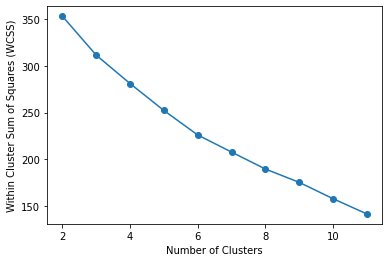

In [172]:
import matplotlib.pyplot as plt
x=np.arange(2,12)
plt.plot(x,wcss)
plt.scatter(x,wcss)
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters");

In [173]:
clf_final=KMeans(n_clusters=6,random_state=42,init='k-means++')

In [174]:
clf_final.fit(X)

KMeans(n_clusters=6, random_state=42)

In [175]:
final_cluster["Clusters"]=clf_final.predict(X)

In [176]:
final_cluster.head()

,serial,pnum,DVAge,eptime,Gender,Work_status,Income,Primary_activity,Location,Enjoy,Marital_status,Relationship,No of Vehilce,No of Adults,No of Child,Activity_with_spouse,Clusters
0,11131003,1,59,90,1,2.000000,2001,1110,13.000000,5.000000,6.000000,3.000000,1.000000,2,0,0,0
1,12020213,1,37,10,2,2.000000,6500,111,11.000000,2.000000,3.000000,1.000000,2.000000,2,0,1,2
2,12140712,1,53,10,1,2.000000,10000,310,11.000000,3.000000,3.000000,1.000000,3.000000,3,0,0,5
3,12151211,1,63,10,2,1.000000,3500,110,11.000000,4.000000,3.000000,1.000000,1.000000,2,0,0,1
4,12201011,1,53,10,1,1.000000,3400,111,11.000000,3.000000,3.000000,1.000000,1.000000,4,1,1,5


In [177]:
final_cluster.to_csv('Final_Clusters.csv')

In [178]:
cluster_excel = final_cluster.groupby(["Clusters","Work_status","Gender"]).agg({"Income":"mean","eptime":'mean',"serial":"count"}).sort_values('Income')

In [179]:
final_cluster.groupby(["Clusters","Work_status","Gender"]).agg({"Income":"mean","eptime":'mean',"serial":"count"})

Income  eptime  serial
Clusters Work_status Gender                            
0        2.000000    1      2001.000000  90      1     
                     2      3333.333333  50      3     
1        1.000000    2      3500.000000  10      1     
         2.000000    2      1500.000000  10      1     
         4.000000    2      1350.000000  65      2     
2        2.000000    2      4483.333333  15      6     
         6.000000    2      3000.000000  20      2     
3        2.000000    2      5000.000000  10      1     
         4.000000    2      4250.000000  10      2     
         5.000000    2      8500.000000  10      1     
         8.000000    2      9000.000000  10      1     
4        2.000000    2      1720.000000  60      1     
5        1.000000    1      4700.000000  10      2     
         2.000000    1      4980.000000  14      5     
         3.000000    1      1800.000000  10      1

In [180]:
cluster_excel.columns = ['Income','eptime','serial']

In [181]:
cluster_Excel = cluster_excel.reset_index()

In [182]:
cluster_excel.sort_values(by='Clusters')

Income  eptime  serial
Clusters Work_status Gender                            
0        2.000000    1      2001.000000  90      1     
                     2      3333.333333  50      3     
1        4.000000    2      1350.000000  65      2     
         2.000000    2      1500.000000  10      1     
         1.000000    2      3500.000000  10      1     
2        6.000000    2      3000.000000  20      2     
         2.000000    2      4483.333333  15      6     
3        4.000000    2      4250.000000  10      2     
         2.000000    2      5000.000000  10      1     
         5.000000    2      8500.000000  10      1     
         8.000000    2      9000.000000  10      1     
4        2.000000    2      1720.000000  60      1     
5        3.000000    1      1800.000000  10      1     
         1.000000    1      4700.000000  10      2     
         2.000000    1      4980.000000  14      5

In [183]:
cluster_excel.to_csv('cluster_representation.csv')

In [184]:
fig = px.scatter(final_cluster, x = 'eptime', y = "Income", color = 'Clusters')
    
fig.update_layout(title = 'Scatterplot of Total activity time and Total Income',
                  xaxis_title = 'Activity time in mins',
                  yaxis_title = 'Total Income')
    
fig.show()

In [185]:
final_data.head()

,serial,pnum,dia_wt_a,dia_wt_b,eptime,whatdoing,What_Oth1,WhereWhen,Device,WithSpouse,Enjoy,ind_wt,DMSex,WorkSta,DVAge,MarStat,Relate2,VehNum,hh_wt,NumAdult,NumChild,Income
0,11131003,1,1.089639,0.648327,90,1110,8310.000000,13.000000,0.000000,0,5.000000,0.985260,1,2.000000,59,6.000000,3.000000,1.000000,1.037847,2,0,2001
1,12020213,1,1.792575,1.287484,10,111,7241.000000,11.000000,1.000000,1,2.000000,1.044666,2,2.000000,37,3.000000,1.000000,2.000000,1.079038,2,0,6500
2,12140712,1,0.778611,1.310585,10,310,7241.000000,11.000000,1.000000,0,3.000000,1.033351,1,2.000000,53,3.000000,1.000000,3.000000,0.943262,3,0,10000
3,12151211,1,0.432987,0.724197,10,110,111.000000,11.000000,0.000000,0,4.000000,0.743763,2,1.000000,63,3.000000,1.000000,1.000000,0.771611,2,0,3500
4,12201011,1,1.082605,0.790312,10,111,310.000000,11.000000,0.000000,1,3.000000,0.980446,1,1.000000,53,3.000000,1.000000,1.000000,0.913826,4,1,3400


In [186]:
final_data.shape

(30, 22)